## Lab 4 -- Web scraping and the Twitter API

So far in this course we have dealt with data which has been collected by someone else and has appeared in a neat, nice format. Unfortunately a good deal of data doesn't appear to us in a clean format. we have to wrestle with the data so that it's in a nice format for us to analyze. This is where web scraping and APIs come into play.

*Web scraping* is the process of accessing unstructured or semi-structured data which is on the web and turning it into data we can use, i.e. a structured dataset.

In this course we are going to focus on two types of web scraping: screen scraping and APIs (or Application Programming Interfaces). Screen scraping is a technique for extracting data from the source code of the website. APIs, on the other hand, are a service which is provided by a company or organization with the intent of delivering data to some end user.

Because bandwidth is expensive and making automated hits to a website may "[clog up](https://en.wikipedia.org/wiki/Denial-of-service_attack) the [tubes](https://www.youtube.com/watch?v=f99PcP0aFNE)", we need to have to some rules for accessing sites and APIs. If you're interested in a particular site, check to see if an API is available. For instance, we could collect Twitter data by going to twitter.com and saving the website to a file. Or we could use [Twitter's API](dev.twitter.com) for collecting tweets. Second, try to limit your bandwidth usage. It's helpful to do this by only accessing the site once, then saving the HTML to disk. Lastly, pay attention to rate limits and terms of service. We'll discuss much of this below.

## Screen scraping

The basic language which has underlied the web for the past few decades is HTML, or HyperText Markup Language. Several of you in this course have worked with HTML, so this shouldn't be new to you. Supplementing HTML more recently is CSS, or Cascading Style Sheets. There's also JavaScript, but we will not talk much about that today.

The first thing about screen scraping we need to know the structure of the web page we want to scrape. All web pages follow a basic structure of *elements*. Elements are *nested* within each other, which means that elements can fit inside of other elements. 

![](img/page_structure_example.jpg)

Above image from [this site](https://alleasytricks.files.wordpress.com/2015/02/page_structure_example.jpg).

In the example above, the element at the top (also called the *root* element) is <code>html</code>. Within that, there's a number of other elemnts which contain information which might be helpful for us. Usually, when we are screen scraping for social data, we want to get some text elements. In the image above, those elements with text data are <code>title</code>, <code>h1</code>, and the two <code>p</code> elements. Those are all HTML *tags*. But we can also access elements by CSS attributes. Most importantly, we can access elements by the CSS attributes <code>class</code> and <code>id</code>.

From here, let's split the kinds of task of screen scraping into two types of tasks depending on our data format: table format and unstructured format.

### Screen scraping in table format

Lots of the data which we want to collect is already in format which looks like a Data Frame. Tables are a common part of the structure of many websites, so there's a set of common methods for collecting them.

Let's take a look at a website which has many tables: Wikipedia. In particular, let's look at the Wikipedia site for the [List of census metropolitan areas and agglomerations in Canada](https://en.wikipedia.org/wiki/List_of_census_metropolitan_areas_and_agglomerations_in_Canada). The table on this site looks like this.

![](img/top-100-cities.png)

There's a number of columns which would be relevant for statistical analyses, including population rank in 2006 and 2011, population in those years, and the change in population between those years. There's also province and geographic name.

Once we've identified our table, we need to find a way to collect it. We can do this by identifying which HTML tags and CSS attributes identify this table. To do this, we can use the "Inspect" or "View Source" feature in our web browsers. On my computer (my Mac, using Google Chrome), I have an "Inspect" option. This will probably look different on the lab computers and also depend on the browser you're using.

![](img/chrome-inspect.png)

Once you click "Inspect" or "View Source", you'll get something that looks like the screenshot below. Tools like the Chrome inspect are nice because they allow you to see the HTML element and then it also visually selects the element on the screen. 

![](img/inspect-selected.png)

It will be useful here to highlight the HTML elements we are looking for in the table, and what CSS attributes we use.

For any HTML table, there are several necessary parts. The <code>&lt;table&gt;</code> tag declares that there's going to be a table here. The <code>&lt;tr&gt;</code> tag declares that there is going to be a row. The <code>&lt;th&gt;</code> and <code>&lt;td&gt;</code> tags are similar: they both denote that this is a cell of the table. However, the <code>&lt;th&gt;</code> tag is a header cell while <code>&lt;td&gt;</code> is any other cell in the table.

    <table>
        <tr>
            <th>Header1</th><th>Header2</th>
        </tr>
        <tr>
            <td>Data1</td><td>Data2</td>
        </tr>
        <!-- ... more rows here ... -->
    </table>

We also note that there's two CSS attributes of importance above: <code>class</code> and <code>id</code>. An HTML element can take on an virtually unlimited number of classes, while an HTML element can only have one ID and it should unique to the webpage.

In this case, the Wikipedia table here has no <code>id</code>, but it has three classes: <code>wikitable, sortable,</code> and <code>jquery-tablesorter</code>.

Okay, now that we have gone through the HTML, we need to actually collect the data.

First, we need to import a few important modules. <code>urllib</code> is a module which allows us to make a request of a webpage. <code>bs4</code> and the BeautifulSoup object let us navigate the HTML element tree.

In [1]:
import urllib.request
from bs4 import BeautifulSoup

After importing, we need to request the URL, read all the data from it, then parse it with BeautifulSoup.

In [2]:
## Request the URL
url = "https://en.wikipedia.org/wiki/List_of_census_metropolitan_areas_and_agglomerations_in_Canada"
res = urllib.request.urlopen(url)

In [3]:
## Read the data into from the url as a string
html = res.read()

In [5]:
## parse with BeautifulSoup
bs = BeautifulSoup(html, "html.parser")

After we get the webpage into BeautifulSoup, we can start accessing HTML elements by HTML tag and by CSS. The two main methods we will use for that are <code>find_all</code> and <code>find</code>. <code>find_all</code> will find all elements which match our criteria and return them as a list, while <code>find</code> will only find the first.

Given that there's only one table in this page, we can just get the first table.

In [6]:
tables = bs.find_all('table')
table  = tables[0]

Alternatively, we could try to find this by class. <code>wikitable</code> was one of the classes, so let's try to use that as an argument to <code>find</code>.

In [11]:
table = bs.find("table", "wikitable")

In [15]:
div_thumb = bs.find_all("div", "thumb")

In [16]:
div_thumb

[<div class="thumb tright">
 <div class="thumbinner" style="width:252px;"><a class="image" href="/wiki/File:Toronto_Skyline_September_2014.jpg"><img alt="" class="thumbimage" data-file-height="2848" data-file-width="4272" height="167" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/16/Toronto_Skyline_September_2014.jpg/250px-Toronto_Skyline_September_2014.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/16/Toronto_Skyline_September_2014.jpg/375px-Toronto_Skyline_September_2014.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/16/Toronto_Skyline_September_2014.jpg/500px-Toronto_Skyline_September_2014.jpg 2x" width="250"/></a>
 <div class="thumbcaption">
 <div class="magnify"><a class="internal" href="/wiki/File:Toronto_Skyline_September_2014.jpg" title="Enlarge"></a></div>
 Toronto</div>
 </div>
 </div>, <div class="thumb tright">
 <div class="thumbinner" style="width:222px;"><a class="image" href="/wiki/File:Montreal_skyline_2011.jpg"><img alt="" class="thum

That should have given us the same result.

Now, we need to get all the rows from the table. We can do this by using <code>find_all</code> with the elements which contain the rows, <code>tr</code>.

In [17]:
rows = table.find_all("tr")

In [18]:
rows

[<tr>
 <th>Rank<br/>
 (2011)</th>
 <th>Rank<br/>
 (2006)</th>
 <th>Geographic name</th>
 <th>Province</th>
 <th>Type</th>
 <th>Population<br/>
 (2011)</th>
 <th>Population<br/>
 (2006)</th>
 <th>Change</th>
 </tr>, <tr>
 <td align="center">1</td>
 <td align="center">1</td>
 <td><a href="/wiki/Greater_Toronto_Area" title="Greater Toronto Area">Toronto</a> (<a href="/wiki/Mississauga" title="Mississauga">Mississauga</a>)</td>
 <td><a href="/wiki/Ontario" title="Ontario">Ontario</a></td>
 <td><a href="/wiki/Census_geographic_units_of_Canada#Census_metropolitan_areas" title="Census geographic units of Canada">CMA</a></td>
 <td align="right" bgcolor="#F9F9F9" rowspan="1">5,583,064</td>
 <td align="right" bgcolor="#F9F9F9" rowspan="1">5,113,149</td>
 <td align="right" bgcolor="#F9F9F9" rowspan="1"><span class="sortkey" style="display:none">7000919032478811000♠</span><font style="color:green">+9.19%</font></td>
 </tr>, <tr>
 <td align="center">2</td>
 <td align="center">2</td>
 <td><a href="/

Now, remember that the first row of probably every table you'll encounter on the web are column names. Therefore, we need to treat the first column differently. Namely, we want to collect these names and save them for later.

So we will <code>find_all</code> instances of <code>th</code> in the first row. From there, we will get the text from the cell using <code>.text</code>, which is a signal to the HTML element that we want the text within the cell. After that, we'll use the string methods <code>strip</code> and <code>replace</code> to clean up the text a little so they are proper column names. Then we'll add them to a list called <code>columns</code>.

In [19]:
columns = []
header_cells = rows[0].find_all("th") 

for cell in header_cells:
    header = cell.text
    header = header.strip()
    header = header.replace("\n", " ")
    columns.append(header)

In [20]:
columns

['Rank (2011)',
 'Rank (2006)',
 'Geographic name',
 'Province',
 'Type',
 'Population (2011)',
 'Population (2006)',
 'Change']

Now that we have the titles, we can collect the actual data from the file. We'll loop through all the rows, starting at the second one. Then we'll loop through all the cells in the row. To make this stuff all easy to find into <code>pandas</code>, we'll store the data from each row in a tuple. Remember tuples? 

Adding to a tuple is a little weird. You can only add a tuple to another tuple. So we'll begin by creating an empty tuple, then add to it by adding another tuple with one element in it.

In [23]:
data = []
for row in rows[1:]:
    cells = row.find_all("td")
    
    ## create an empty tuple
    dt = ()
    for cell in cells:
        ## dp stands for "data point"
        font = cell.find("font")
        
        if font is not None:
            dp = font.text
        else:
            dp = cell.text

        dp = dp.strip()
        dp = dp.replace("\n", " ")
        
        ## add to tuple
        dt = dt + (dp,)
    data.append(dt)

In [24]:
data

[('1',
  '1',
  'Toronto (Mississauga)',
  'Ontario',
  'CMA',
  '5,583,064',
  '5,113,149',
  '+9.19%'),
 ('2',
  '2',
  'Montreal (Laval)',
  'Quebec',
  'CMA',
  '3,824,221',
  '3,635,556',
  '+5.19%'),
 ('3',
  '3',
  'Vancouver (Surrey)',
  'British Columbia',
  'CMA',
  '2,313,328',
  '2,116,581',
  '+9.30%'),
 ('4',
  '4',
  'Ottawa–Gatineau',
  'Ontario/Quebec',
  'CMA',
  '1,236,324',
  '1,133,633',
  '+9.06%'),
 ('5', '5', 'Calgary', 'Alberta', 'CMA', '1,214,839', '1,079,310', '+12.56%'),
 ('6', '6', 'Edmonton', 'Alberta', 'CMA', '1,159,869', '1,034,945', '+12.07%'),
 ('7',
  '7',
  'Quebec City (Lévis)',
  'Quebec',
  'CMA',
  '765,706',
  '719,153',
  '+6.47%'),
 ('8', '8', 'Winnipeg', 'Manitoba', 'CMA', '730,018', '694,668', '+5.09%'),
 ('9',
  '9',
  'Hamilton (Burlington)',
  'Ontario',
  'CMA',
  '721,053',
  '692,911',
  '+4.06%'),
 ('10',
  '11',
  'Kitchener–Cambridge–Waterloo',
  'Ontario',
  'CMA',
  '477,160',
  '451,235',
  '+5.75%'),
 ('11', '10', 'London', 'Ont

Once we've done that, we can import this entire thing into <code>pandas</code> pretty easily.

In [45]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data, columns = columns)

In [26]:
df

,Rank (2011),Rank (2006),Geographic name,Province,Type,Population (2011),Population (2006),Change
0,1,1,Toronto (Mississauga),Ontario,CMA,"5,583,064","5,113,149",+9.19%
1,2,2,Montreal (Laval),Quebec,CMA,"3,824,221","3,635,556",+5.19%
2,3,3,Vancouver (Surrey),British Columbia,CMA,"2,313,328","2,116,581",+9.30%
3,4,4,Ottawa–Gatineau,Ontario/Quebec,CMA,"1,236,324","1,133,633",+9.06%
4,5,5,Calgary,Alberta,CMA,"1,214,839","1,079,310",+12.56%
5,6,6,Edmonton,Alberta,CMA,"1,159,869","1,034,945",+12.07%
6,7,7,Quebec City (Lévis),Quebec,CMA,"765,706","719,153",+6.47%
7,8,8,Winnipeg,Manitoba,CMA,"730,018","694,668",+5.09%
8,9,9,Hamilton (Burlington),Ontario,CMA,"721,053","692,911",+4.06%
9,10,11,Kitchener–Cambridge–Waterloo,Ontario,CMA,"477,160","451,235",+5.75%


And voilà, we have a dataframe from the table on the web.

We need to massage the data a bit to do things like calculate means and generate graphs. The types of the columns are all <code>object</code>. Which means we have to do some conversions.

In [27]:
df.dtypes

Rank (2011)          object
Rank (2006)          object
Geographic name      object
Province             object
Type                 object
Population (2011)    object
Population (2006)    object
Change               object
dtype: object

Say we want to look at 2011 population. Using string functions for columns, we need to first remove the commas from population. Then we need to convert the number to an integer. Once that's done, we can take the mean.

In [28]:
df['Population (2011)'] = df['Population (2011)'].str.replace(',', '')
df['Population (2011)'] = df['Population (2011)'].astype(np.int64)
df['Population (2011)'].mean()

186632.4149659864

In [29]:
df['Population (2011)']

0      5583064
1      3824221
2      2313328
3      1236324
4      1214839
5      1159869
6       765706
7       730018
8       721053
9       477160
10      474786
11      392184
12      390328
13      356177
14      344615
15      319246
16      260600
17      210556
18      201890
19      196966
20      187013
21      179839
22      170191
23      160770
24      159561
25      157790
26      151773
27      141097
28      138644
29      135501
        ...   
117      17090
118      16689
119      16488
120      16214
121      16019
122      15988
123      15569
124      15348
125      15301
126      13839
127      13725
128      13566
129      13524
130      13052
131      12996
132      12973
133      12920
134      12839
135      12762
136      12551
137      12525
138      12489
139      12305
140      12288
141      12146
142      12128
143      11707
144      11583
145      11348
146      10871
Name: Population (2011), dtype: int64

With the population change, we want to convert this to a float, given that the number is a decimal number.

In [55]:
df['Change'] = df['Change'].str.replace('+', '')
df['Change'] = df['Change'].str.replace('%', '')
df['Change'] = df['Change'].str.replace('−', '-')

df['Change'] = df['Change'].astype(np.float64)
df['Change'].mean()

4.948027210884355

Lastly, we can import all our graphing functions and do our regular graphing operations. Let's calculate, say, the histogram of changes between 2006 and 2011.

In [43]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

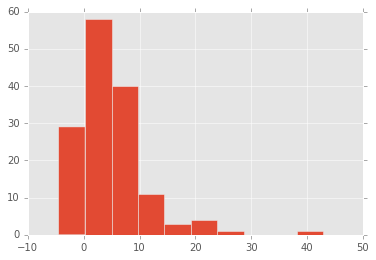

In [44]:
df['Change'].hist()

It looks like most cities saw a population change between 0 and 10%. We saw from the data above that Toronto itself gained 9.2%. One city happened to gain over 40%, and a few cities lost from 0 to 5%.

## Exercise 1

Head to the [Wikipedia page for Academy Award for Best Picture](
https://en.wikipedia.org/wiki/Academy_Award_for_Best_Picture). Write the code to collect the data for the 2016 nominees.

In [57]:
url = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Picture"
res = urllib.request.urlopen(url)

html = res.read()
bs = BeautifulSoup(html, "html.parser")

In [58]:
## method 1
tables = bs.find_all("table")
table = tables[90]

In [60]:
## method 2
tables = bs.find_all("table", "wikitable")
table = tables[-1]

In [65]:
rows = table.find_all("tr")

In [66]:
columns = []
header_cells = rows[0].find_all("th") 

for cell in header_cells:
    header = cell.text
    header = header.strip()
    header = header.replace("\n", " ")
    columns.append(header)

In [67]:
columns

['Film', 'Production company(s)', 'Producer(s)']

In [68]:
data = []
for row in rows[1:]:
    cells = row.find_all("td")
    
    ## create an empty tuple
    dt = ()
    for cell in cells:
        ## dp stands for "data point"
        dp = cell.text
        dp = dp.strip()
        dp = dp.replace("\n", " ")
        
        ## add to tuple
        dt = dt + (dp,)
    data.append(dt)

In [69]:
df = pd.DataFrame(data, columns = columns)

### Screen scraping in unstructured format

Much of the data we'll want to collect will be in a table format. But much of the time, what we want won't be in a table format. There's been a bit of turn away from using tables in web development in the past 10-15 years. Because of that, we will need to dig a little more into the guts of the HTML to extract what we want.

Let's say we're pricing out hockey helmets for ourselves or our relatives for the holidays (many roller derby players actually do wear hockey helmets). We could check out a popular hockey website to see what kinds of helmets are available.

We start off like we did with the table. But here, we try to find the unit which contains each unit we want to collect data on. In this case, it looks like each helmet is in a <code>&lt;li&gt;</code> (or list) element. For the record, the elements we're typically looking for are containers which can hold other elements, which include <code>li, p, div, span,</code> and any of the header elements -- <code>h1, h2, h3, h4, h5, h6</code>.

We also see that each of these elements has the class <code>item</code>. So it seems like a good guess that if we get all the list items, then we'll be on the right track.

![](img/hockey-site.png)

In [71]:
url = "http://www.hockeymonkey.com/equipment/helmets/helmets.html"
res = urllib.request.urlopen(url)

html = res.read()

bs = BeautifulSoup(html, "html.parser")

In [72]:
items = bs.find_all("li", "item")

In [74]:
items[0]

<li class="item first span3">
<div class="quick-hover">
<a class="product-image" href="http://www.hockeymonkey.com/equipment/helmets/helmets/bauer-hockey-helmet-combo-re-akt-100.html" title="Bauer Re-Akt 100 Hockey Helmet Combo"><img alt="Bauer Re-Akt 100 Hockey Helmet Combo" src="http://lgcdn.hockeymonkey.com/80A850/hockey/media/catalog/product/cache/3/small_image/600x/9df78eab33525d08d6e5fb8d27136e95/b/a/bauer-hockey-helmet-combo-re-akt-100.jpg"/></a>
<a class="quickview-trigger" data-target="#quickview-modal" data-toggle="modal" href="http://www.hockeymonkey.com/quickview/index/index/id/173502/category/1565/" oncontextmenu="return false;">QUICKVIEW</a>
<div class="caption">
<h2 class="product-name" data-ribbon='[{"id":"1","product_id":"173502","text":"","valign":"top","align":"left","image_path":"custom\/colors-icon.png","text_style":"","image_style":"","container_style":"z-index: 3","inner_container_style":"","ref_selectors":["div[class~=\"category-products\"]"],"config_template_ke

From there, we have to find how to get the helmet name and the price. Upon further inspect, it looks like the element which contains name is an <code>h2</code> element with class <code>product-name</code>. Price is conained in a <code>span</code> element with class <code>price</code>.

![](img/hockey-name.png)

![](img/hockey-price.png)

From there, we can loop through all the items in the list and store the name and price in their own variables.

In [75]:
data = []
for item in items:
    name = item.find("h2", "product-name")
    name = name.text
    
    price = item.find("span", "price")
    price = price.text
    
    dt = (name, price)
    data.append(dt)

In [76]:
data

[('Bauer Re-Akt 100 Hockey Helmet Combo', '$319.99'),
 ('Bauer Re-Akt 100 Custom Hockey Helmet Combo', '$319.99'),
 ('CCM Fitlite 3DS Hockey Helmet Combo', '$309.99'),
 ('CCM Resistance Hockey Helmet Combo', '$269.99'),
 ('Bauer Re-Akt 100 Hockey Helmet', '$269.99'),
 ('CCM Fitlite Hockey Helmet Combo', '$269.99'),
 ('Bauer Re-Akt 100 Custom Hockey Helmet', '$269.99'),
 ('CCM Fitlite 3DS Hockey Helmet', '$259.99'),
 ('Bauer Re-Akt Hockey Helmet Combo', '$249.99'),
 ('CCM Resistance Hockey Helmet', '$229.99'),
 ('Bauer Re-Akt Hockey Helmet', '$199.99'),
 ('Bauer IMS 11.0 Hockey Helmet Combo', '$199.99'),
 ('CCM Resistance 300 Hockey Helmet Combo', '$199.99'),
 ('Bauer IMS 11.0 Custom Hockey Helmet Combo', '$199.99'),
 ('CCM Fitlite Hockey Helmet', '$240.99'),
 ('Warrior Covert PX+ Hockey Helmet Combo', '$199.99'),
 ('Bauer IMS 9.0 Hockey Helmet Combo', '$179.99'),
 ('Warrior Krown PX3 Hockey Helmet Combo', '$179.99'),
 ('Warrior Covert PX+ Hockey Helmet', '$179.99'),
 ('Warrior Krown LT

And from there, we can store all these data into a DataFrame again.

In [77]:
df = pd.DataFrame(data, columns = ['Name', 'Price'])

In [78]:
df

,Name,Price
0,Bauer Re-Akt 100 Hockey Helmet Combo,$319.99
1,Bauer Re-Akt 100 Custom Hockey Helmet Combo,$319.99
2,CCM Fitlite 3DS Hockey Helmet Combo,$309.99
3,CCM Resistance Hockey Helmet Combo,$269.99
4,Bauer Re-Akt 100 Hockey Helmet,$269.99
5,CCM Fitlite Hockey Helmet Combo,$269.99
6,Bauer Re-Akt 100 Custom Hockey Helmet,$269.99
7,CCM Fitlite 3DS Hockey Helmet,$259.99
8,Bauer Re-Akt Hockey Helmet Combo,$249.99
9,CCM Resistance Hockey Helmet,$229.99


Like the transformation above, we can convert the price to a float and take the mean, once we remove the dollar sign from the text.

In [79]:
df['Price'] = df['Price'].str.replace('$', '')

df['Price'] = df['Price'].astype(np.float64)
df['Price'].mean()

235.53999999999988

## Exercise 2

Look at this [name website](http://www.behindthename.com/names/usage/english). Collect the name, the gender, and the linguistic origin.

In [80]:
url = "http://www.behindthename.com/names/usage/english"
res = urllib.request.urlopen(url)
html = res.read()
bs   = BeautifulSoup(html, "html.parser")

In [81]:
items = bs.find_all("div", "browsename")

In [84]:
data = []
for item in items:
    name = item.find('b')
    name = name.text
    
    if item.find('span', 'masc') is not None:
        gender = 'm'
    
    if item.find('span', 'fem') is not None:
        gender = 'f'
        
    if item.find('span', 'masc') is not None \
        and item.find('span', 'fem') is not None:
        gender = 'm & f'
    
    lo = item.find_all('span', 'info')
    lo = lo[-1]
    lo = lo.text
    
    dt = (name, gender, lo)
    data.append(dt)

In [86]:
df = pd.DataFrame(data, columns = ['Name', 'Gender', 'Linguistic Origin'])

In [87]:
df

,Name,Gender,Linguistic Origin
0,AALIYAH,f,"Arabic, English (Modern)"
1,AAREN,m & f,English (Rare)
2,AARON,m,"English, Jewish, Biblical, Biblical Latin, Bib..."
3,ABBEY,f,English
4,ABBI,f,English
5,ABBIE,f,English
6,ABBY,f,English
7,ABE (1),m,"English, Jewish"
8,ABEGAIL,f,English (Rare)
9,ABEL,m,"English, French, Spanish, Portuguese, Georgian..."


## APIs

APIs, or Application Programming Interfaces, are a method of accessing data from a business or government organization. Many, if not most, social media companies have some kind of API which are made available to third-party developers and researchers. Some of these work better for researchers than others.

You can think of an API request as what happens when you access a website with a web browser. You type in the URL for a page or click a link, and then the internet gives you want you want. Something similar happens when you make an API request. You are accessing a particular URL which will return a set of requested infomation.

In the examples which are working with in this lab, the information is returned in JSON, or **J**ava**S**cript **O**bject **N**otation. This is usually pronounced like "JAY-SAAN". JSON is structured a lot like Python objects, with dictionaries and lists being the main objects. For instance, a tweet is sort of structured like this:

In [1]:
tweet_json = """
{
    "id": 12345,
    "created_at": "2016-11-01",
    "text": "I am really into #python programming. #winning",
    "user": {
        "id": 2345,
        "screen_name": "alexhanna",
        "name": "Alex Hanna"
    },
    "entities": {
        "hashtags": [
            {
                "name": "#python"
            },
            {
                "name": "#winning"
            }
        ]
    }
}"""

To parse it into something Python can use, we use the <code>json</code> module. Once there, we can access parts of it like a dictionary.

In [2]:
import json
tweet_obj = json.loads(tweet_json)

print(tweet_obj['user']['name'])
print(tweet_obj['text'])
for ht in tweet_obj['entities']['hashtags']:
    print(ht['name'])

Alex Hanna
I am really into #python programming. #winning
#python
#winning


## Accessing the Twitter API through <code>tweepy</code>

First we need install a package called <code>tweepy</code>. Instead of handling all the URL requests by hand, <code>tweepy</code> does this all behind the scenes. We install a new package through Jupyter Notebook like so. This has the effect of running this same command on the Windows, Mac, or UNIX command-line.

In [3]:
!pip install tweepy --prefix=packages

After that, we need to load the newly installed <code>tweepy</code> module into our library path. The path is where Python looks for new libraries. Because we don't have permission to permanently install new packages, we can tell Python to look in the packages folder where we told it to put the new module.

In [4]:
import os
import sys
#path = '/packages/Lib/site-packages'
## If you are running this on Mac, comment out the previous line 
## and uncomment the line below
path = '/packages/lib/python3.5/site-packages'
sys.path.insert(0, os.getcwd() + path)

In [1]:
from slistener import SListener
import json
import time
import tweepy
import sys

ImportError: No module named 'slistener'

In [ ]:
## authentication
access_token = ""
access_token_secret = ""
consumer_key = ""
consumer_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api  = tweepy.API(auth)

After that, we can start tracking things from Twitter's stream. This is only a small sample of possible things we can get from Twitter. To get full access, you need to pay a company to get historical data.

For now, we'll pick some fairly obvious keywords which will be on Twitter which related to US politics. There's other [things we can track](https://dev.twitter.com/streaming/reference/post/statuses/filter) here, but for now we'll just track keywords.

In [ ]:
## set up words to track
track = ['trump', 'bannon']

listen = SListener(api, 'politics')
stream = tweepy.Stream(auth, listen)

print("Streaming started...")

stream.filter(track = track)

Finally, we want to convert this all to a DataFrame. The problem is that with the nested structure of a tweet, it's kind of difficult to put it in a rectangular format. For that, we'll do a little bit of "flattening" of the data. This entails going through all the files, then going through all the tweets in those files and putting them into a column at the top level of the nested structure. In particular, let's get the screen names of users, the text and users of retweets, and the text and users of quoted tweets.

In [ ]:
import glob
import pandas as pd
import numpy as np

In [ ]:
tweets = []
files  = list(glob.iglob('election2016*.json'))
for f in files:
    fh = open(f, 'r', encoding = 'utf-8')
    tweets_json = fh.read().split("\n")

    ## remove empty lines
    tweets_json = list(filter(len, tweets_json))

    ## parse each tweet
    for tweet in tweets_json:
        try:
            tweet_obj = json.loads(tweet)

            ## flatten the file to include quoted status and retweeted status info
            if 'quoted_status' in tweet_obj:
                tweet_obj['quoted_status-text'] = tweet_obj['quoted_status']['text'] 
                tweet_obj['quoted_status-user-screen_name'] = tweet_obj['quoted_status']['user']['screen_name']

            if 'retweeted_status' in tweet_obj:
                tweet_obj['retweeted_status-user-screen_name'] = tweet_obj['retweeted_status']['user']['screen_name']
                tweet_obj['retweeted_status-text'] = tweet_obj['retweeted_status']['text']

            tweet_obj['user-screen_name'] = tweet_obj['user']['screen_name']

            tweets.append(tweet_obj)
        except:
            pass

In [ ]:
## create pandas DataFrame for further analysis
df_tweet = pd.DataFrame(tweets)